In [56]:
from functools import reduce
import numpy as np
from constants import *
from green_function import *
#import holoviews
from scipy import linalg as sla
import matplotlib as mp
plt.style.use('seaborn')		# Setting the plotting style
mp.rcParams['figure.figsize'] = (15, 10)  # Setting the size of the plots
import numpy.linalg as la 


N = 100

def evolution_operator(hamiltonians, T):
    n = len(hamiltonians)
    exps = [sla.expm(-1j * h * T / n) for h in hamiltonians]
    return reduce(np.matmul, exps)


def calculate_finite_spectrum(periods, hamiltonians):
    energies = []
    for T in periods:
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def calculate_bands(momenta, hamiltonians_k, T):
    energies = []
    for k in momenta:
        hamiltonians = [h_k(k) for h_k in hamiltonians_k]
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.title('Energy Spectrum of Chain with {} Sites'.format(N))
    plt.show()


e_threshold = 1E-6


def check_pi_modes(evals):
    nzmodes = 0
    zmodes_ind = np.where(abs(evals) >= 1-e_threshold)[0]
    return zmodes_ind,len(zmodes_ind)
    

def plot_pi_modes(evals,evecs):

    
    pi_modes_ind,cnt_pi_modes = check_pi_modes(evals)
    if cnt_pi_modes > 0:
        fig,ax = plt.subplots(1,cnt_pi_modes,figsize=(20, 10))
        fig.suptitle('Probability distribution of Pi modes',fontsize=20, fontweight='bold')
        for cnt in range(cnt_pi_modes):
            ax1 = ax[cnt]
            ax1.plot(np.abs(evecs[:,pi_modes_ind[cnt]])**2)
            ax1.set_title('Edge mode {}'.format(cnt+1),fontsize=20)
            ax1.set_xlabel('Site Number',fontsize=20)
            ax1.set_ylabel('$|\psi|^2$',fontsize=20)
            #ax1.text(0.43, 0.95, param_info, transform=ax1.transAxes, fontsize=16,
        #verticalalignment=('top', bbox=dict(boxstyle="square",facecolor="white"))
            ax1.tick_params(axis='both', which='major', labelsize=16)
        #plt.savefig('Edge_modes_Kitaev.pdf')
        plt.show()

In [2]:
def onsite(mu=mu):
    return -mu * s_z


def hopping(t=t, delta=delta):
    return -t * s_z +  1j * delta * s_y

In [40]:
periods = np.linspace(0.2 / t, 10 / t, 100)
momenta = np.linspace(-2*np.pi, 2*np.pi,100)

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=t))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=t))


energies = calculate_finite_spectrum(periods, [h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()])
spectrum = np.array([calculate_bands(momenta, [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian], T) for T in periods])

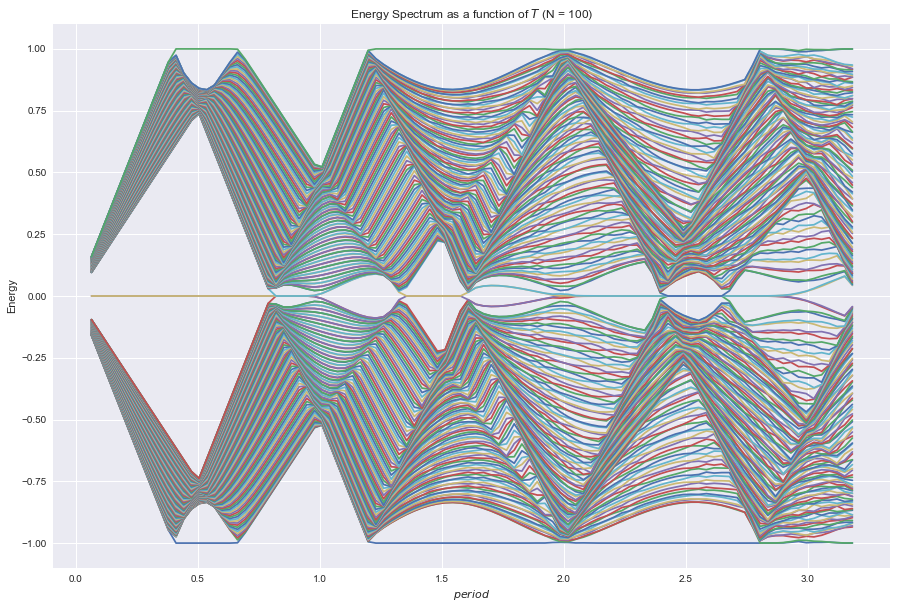

In [41]:
plt.title("Energy Spectrum as a function of $T$ (N = {})".format(N))
for i in range(d*N):
    plt.plot(periods,energies[:,i]/np.pi)
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()

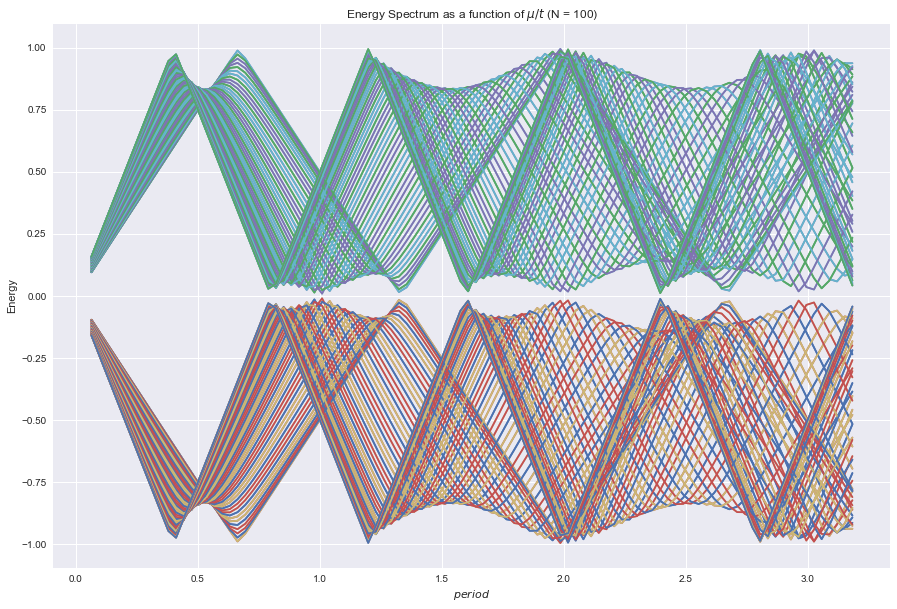

In [42]:
plt.title("Energy Spectrum as a function of $\mu/t$ (N = {})".format(N))
for i in range(100):
    plt.plot(periods,spectrum[:,i]/np.pi)
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()
#plt.savefig('interesting bulk spectrum.png')

In [158]:
Delta = 1.0*t
N = 2000
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=3.1)
h_f = 1j * sla.logm(U)/np.pi
#plot_spectrum(h_f)

logm result may be inaccurate, approximate err = 5.406567876009079e-13


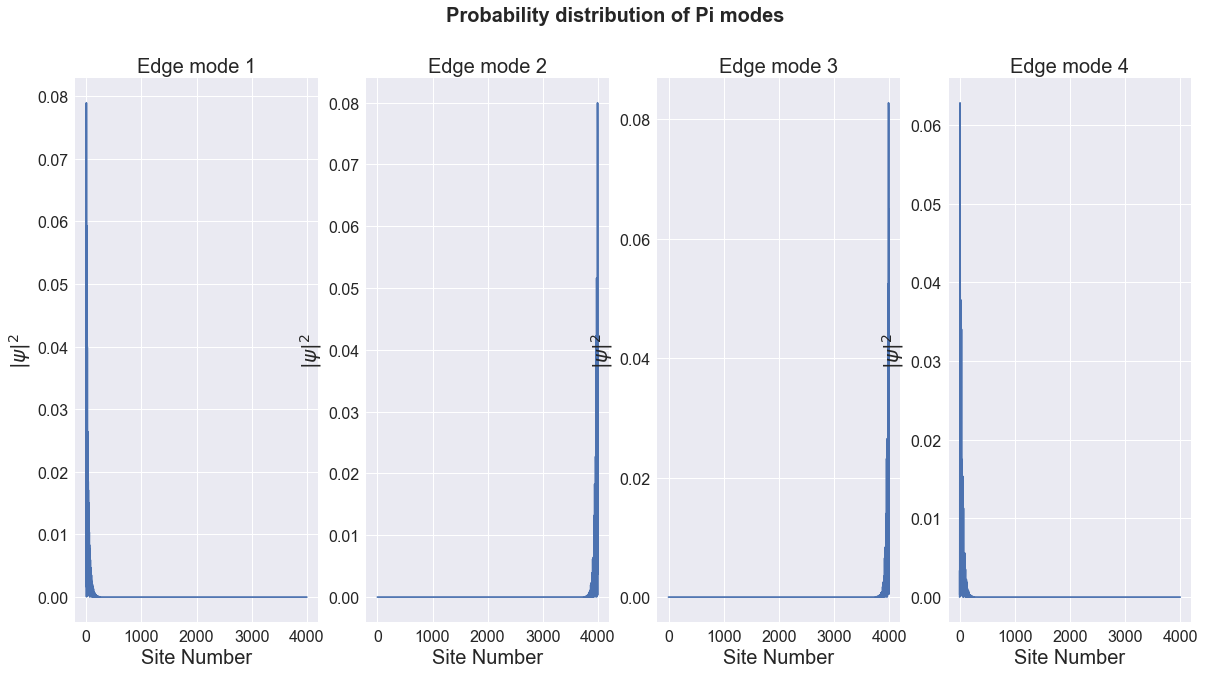

In [159]:
evals,evecs = la.eigh(h_f)
plot_pi_modes(evals,evecs)

In [81]:
N = 100
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos100 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos100.append(-np.trace(G.imag))


In [84]:
N = 200
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos200 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos200.append(-np.trace(G.imag))


In [85]:
N = 300
Delta = 1.0*t
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos300 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos300.append(-np.trace(G.imag))

logm result may be inaccurate, approximate err = 2.4857035375362846e-13
logm result may be inaccurate, approximate err = 2.588523101534543e-13
logm result may be inaccurate, approximate err = 2.8526971266402717e-13
logm result may be inaccurate, approximate err = 2.526528093220125e-13
logm result may be inaccurate, approximate err = 2.3059493816256536e-13
logm result may be inaccurate, approximate err = 2.28867531574056e-13
logm result may be inaccurate, approximate err = 2.425513748176861e-13
logm result may be inaccurate, approximate err = 2.36025982978104e-13
logm result may be inaccurate, approximate err = 2.2615444125812352e-13


In [88]:
N = 400
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos400 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos400.append(-np.trace(G.imag))

logm result may be inaccurate, approximate err = 2.4073331144530016e-13
logm result may be inaccurate, approximate err = 2.519735258583074e-13
logm result may be inaccurate, approximate err = 2.5065595019020206e-13
logm result may be inaccurate, approximate err = 2.6496353786065094e-13
logm result may be inaccurate, approximate err = 2.442399133913461e-13
logm result may be inaccurate, approximate err = 2.485721982645173e-13
logm result may be inaccurate, approximate err = 2.373659740485736e-13
logm result may be inaccurate, approximate err = 2.426356852484533e-13
logm result may be inaccurate, approximate err = 2.5376148956616916e-13
logm result may be inaccurate, approximate err = 2.5035254708787046e-13
logm result may be inaccurate, approximate err = 2.557730601391261e-13
logm result may be inaccurate, approximate err = 2.5901285518328376e-13
logm result may be inaccurate, approximate err = 2.769842649620131e-13
logm result may be inaccurate, approximate err = 2.5033375104872936e-13

In [89]:
N = 500
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos500 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in range(len(var_time)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_time[i])
    h_f = 1j * sla.logm(U)
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos500.append(-np.trace(G.imag))

logm result may be inaccurate, approximate err = 2.293808573973265e-13
logm result may be inaccurate, approximate err = 2.363094190650808e-13
logm result may be inaccurate, approximate err = 2.5798478951623246e-13
logm result may be inaccurate, approximate err = 2.749173889009156e-13
logm result may be inaccurate, approximate err = 2.8584227319602856e-13
logm result may be inaccurate, approximate err = 2.9807553323443196e-13
logm result may be inaccurate, approximate err = 2.884025923536979e-13
logm result may be inaccurate, approximate err = 2.861076757315573e-13
logm result may be inaccurate, approximate err = 2.8106182119405987e-13
logm result may be inaccurate, approximate err = 2.856408173397732e-13
logm result may be inaccurate, approximate err = 2.821120055936282e-13
logm result may be inaccurate, approximate err = 2.8627593677396953e-13
logm result may be inaccurate, approximate err = 2.897742140730478e-13
logm result may be inaccurate, approximate err = 3.0141874413465203e-13


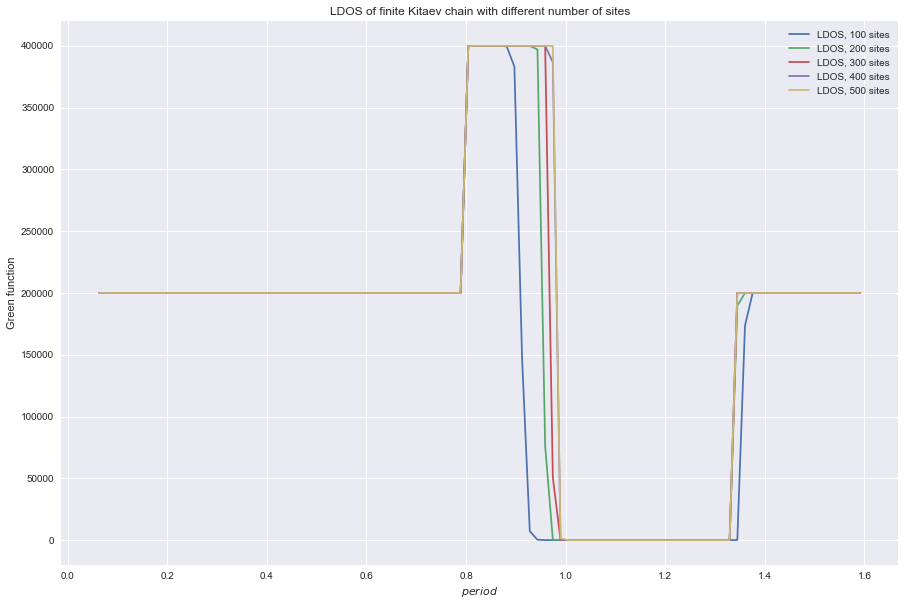

In [92]:
plt.title("LDOS of finite Kitaev chain with different number of sites")
plt.plot(var_time,ldos100, label='LDOS, 100 sites')
plt.plot(var_time,ldos200, label='LDOS, 200 sites')
plt.plot(var_time,ldos300, label='LDOS, 300 sites')
plt.plot(var_time,ldos400, label='LDOS, 400 sites')
plt.plot(var_time,ldos500, label='LDOS, 500 sites')

plt.ylabel('Green function')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [93]:
N = 100

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))

var_T = np.linspace(0.2 / t, 5 / t, 101)
var_E = np.linspace(-2,2,101)
x, y = np.meshgrid(var_T, var_E)
var_ldos = np.zeros((len(var_T),len(var_E)))
for i in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[i])
    h_f = 1j * sla.logm(U)/np.pi
    for j in range(len(var_E)):
        G = np.array(la.inv((var_E[j]+1j*0.00001)*np.eye(len(h_f))-h_f))
        var_ldos[j,i] = -np.trace(G.imag)





C:\Users\Eslam Sabry\AppData\Local\Temp\ipykernel_7788\138679093.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cp)


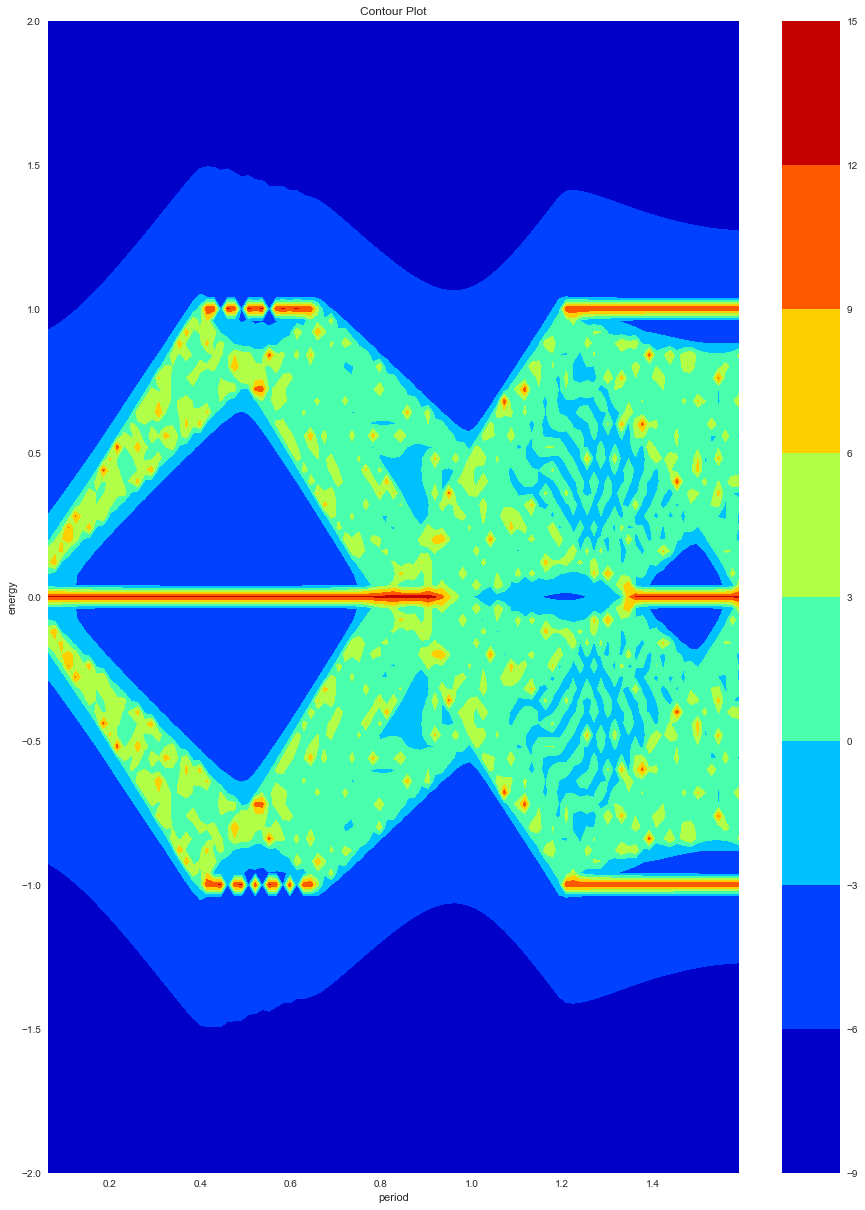

In [94]:
fig = plt.figure(figsize=(15,20))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(x, y, np.log(abs(var_ldos)),cmap='jet')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('period')
ax.set_ylabel('energy')
plt.show()

In [154]:
N = 1000
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))
chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_f = []
var_f_0 = []
var_f_pi = []

for j in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[j])
    h_f = 1j * sla.logm(U)/np.pi
    
    G = np.array(la.inv((0.00000000001*1j)*np.eye(len(h_f))-h_f))
    var_f.append( G[0,1].imag)


    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    var_f_0.append( G_0_odd[0,1].imag)

    G_pi_pos = np.array(la.inv((1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd = (G_pi_pos - G_pi_neg)/2
    var_f_pi.append( G_pi_odd[0,1].imag)





logm result may be inaccurate, approximate err = 3.7349933565921854e-13
logm result may be inaccurate, approximate err = 3.5932062091872583e-13
logm result may be inaccurate, approximate err = 3.603487200748535e-13
logm result may be inaccurate, approximate err = 3.8052604986087673e-13
logm result may be inaccurate, approximate err = 3.5901257288831187e-13
logm result may be inaccurate, approximate err = 3.481488262267929e-13
logm result may be inaccurate, approximate err = 3.566364612998886e-13
logm result may be inaccurate, approximate err = 3.4827419115442405e-13
logm result may be inaccurate, approximate err = 3.6869788869085203e-13
logm result may be inaccurate, approximate err = 3.922982930866823e-13
logm result may be inaccurate, approximate err = 4.134440345516516e-13
logm result may be inaccurate, approximate err = 4.4512653437728915e-13
logm result may be inaccurate, approximate err = 4.556417765871821e-13
logm result may be inaccurate, approximate err = 4.64156455785456e-13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


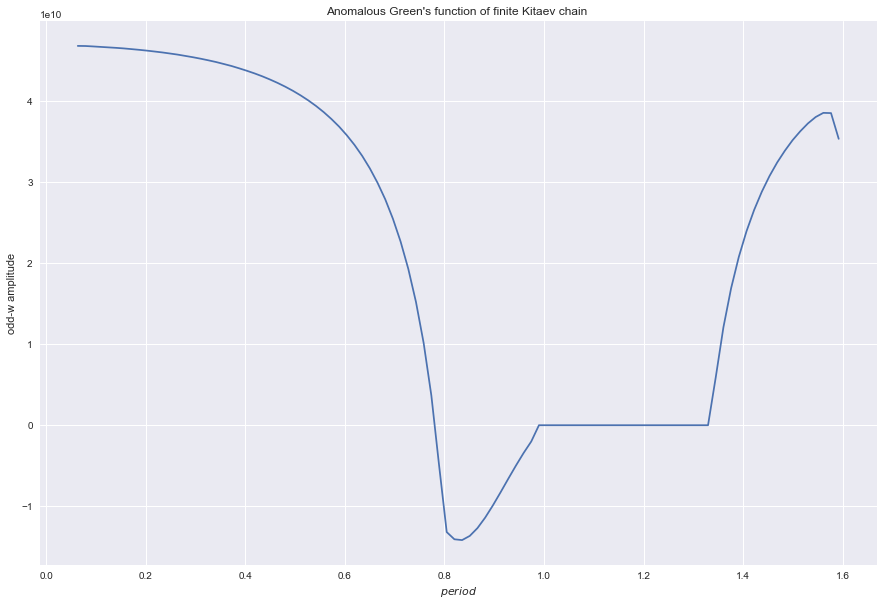

1.5707963267948966


In [155]:
plt.title("Anomalous Green's function of finite Kitaev chain ")
plt.plot(var_T,var_f)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()
print(delta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


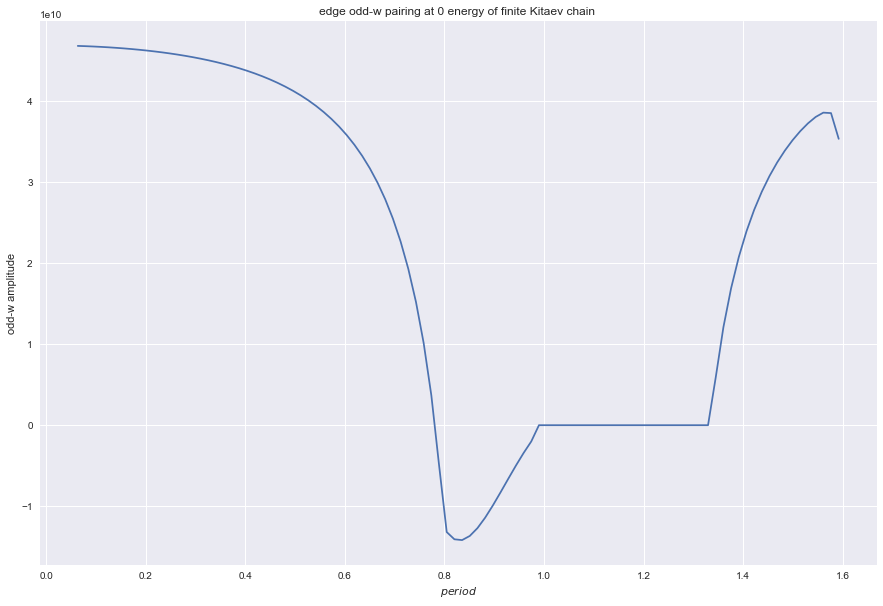

In [156]:

plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,var_f_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


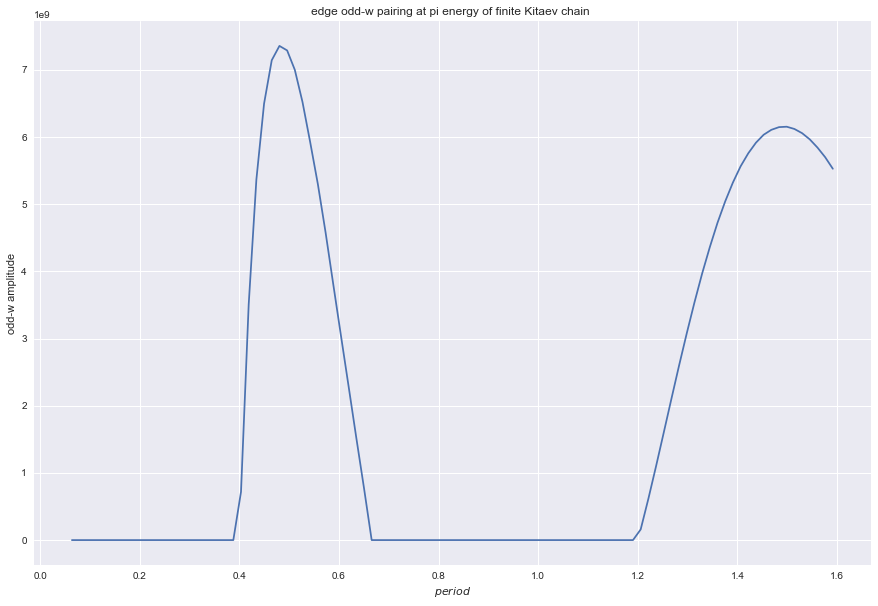

In [157]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_f_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [111]:
#np.savez('anomalous-green-function-600sites-delta=t',period=var_T,pair_amplitude_at_zero_energy=var_f,odd_freq_zero_energy=var_f_0,odd_freq_pi_energy=var_f_pi)

In [121]:
N = 100

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(delta=Delta))
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping(delta=Delta))

var_T = np.linspace(0.2 / t, 5 / t, 101)
var_E = np.linspace(-2,2,101)
x, y = np.meshgrid(var_T, var_E)
f_0_odd = np.zeros((len(var_T),len(var_E)))
f_pi_odd = np.zeros((len(var_T),len(var_E)))
for i in range(len(var_T)):
    U = evolution_operator([h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()],T=var_T[i])
    h_f = 1j * sla.logm(U)/np.pi
    for j in range(len(var_E)):

        G_0_pos = np.array(la.inv((var_E[j] - 0.00000000001*1j)*np.eye(len(h_f))-h_f))
        G_0_neg = np.array(la.inv((-var_E[j] -0.00000000001*1j)*np.eye(len(h_f))-h_f))
        G_0_odd = (G_0_pos - G_0_neg)/2
        f_0_odd[j,i] = G_0_odd[0,1].imag





KeyboardInterrupt: 